# Data preprocessing and cleaning 

# dependency installation 

In [1]:
import pandas as pd
import numpy as np
import os
import sys

In [3]:
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../script')))
from utils import *
from visualizations import *

## file path 

In [5]:
path = '../assets/data/Fraud_Data.csv'
path2 = '../assets/data/IpAddress_to_Country.csv'
path3 = '../assets/data/creditcard.csv'
df_creditcard = data_loader(path3)
df_IpAddress_to_Country = data_loader(path2)
df_fraud_data = data_loader(path)

In [6]:
df_creditcard.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:

column_summary(df_creditcard)

,col_name,col_dtype,num_of_nulls,num_of_non_nulls,num_of_distinct_values,distinct_values_counts
0,Time,float64,0,284807,124592,"{163152.0: 36, 64947.0: 26, 68780.0: 25, 3767...."
1,V1,float64,0,284807,275663,"{1.24567381944824: 77, 2.05579700630039: 77, 2..."
2,V2,float64,0,284807,275663,"{0.166975019545401: 77, -0.32666777306077: 77,..."
3,V3,float64,0,284807,275663,"{0.488305742562781: 77, -2.75204095570008: 77,..."
4,V4,float64,0,284807,275663,"{0.6353219207244: 77, -0.842316033286871: 77, ..."
5,V5,float64,0,284807,275663,"{-0.562776680773863: 77, 2.46307225982454: 77,..."
6,V6,float64,0,284807,275663,"{-1.01107261632698: 77, 3.17385642307029: 77, ..."
7,V7,float64,0,284807,275663,"{0.0149526614685896: 77, -0.432125923987824: 7..."
8,V8,float64,0,284807,275663,"{-0.160210863301812: 77, 0.727706200727824: 77..."
9,V9,float64,0,284807,275663,"{0.17036185217373: 77, 0.608605870267216: 77, ..."


In [8]:
missing_values_table(df_fraud_data)

,Missing Values,% of Total Values


In [9]:

missing_values_table(df_IpAddress_to_Country)

,Missing Values,% of Total Values


In [10]:
missing_values_table(df_creditcard)


,Missing Values,% of Total Values


In [11]:
df_fraud_data.duplicated().sum()
print(f"Number of duplicate rows in df_fraud_data: {df_fraud_data.duplicated().sum()} fraud data")

Number of duplicate rows in df_fraud_data: 0 fraud data


In [12]:
df_creditcard.duplicated().sum()
print(f"Number of duplicate rows in df_fraud_data: {df_creditcard.duplicated().sum()} credit card data")

Number of duplicate rows in df_fraud_data: 1081 credit card data


In [13]:
df_creditcard = df_creditcard.drop_duplicates()


In [14]:
df_IpAddress_to_Country.duplicated().sum()
print(f"Number of duplicate rows in df_fraud_data: {df_IpAddress_to_Country.duplicated().sum()} IpAddress to Country data")

Number of duplicate rows in df_fraud_data: 0 IpAddress to Country data


In [15]:
df_creditcard['Time'] = pd.to_datetime(df_creditcard['Time'], unit='s')

In [17]:
df_IpAddress_to_Country['lower_bound_ip_address'] = df_IpAddress_to_Country['lower_bound_ip_address'].astype('int64')

In [18]:
import ipaddress

df_IpAddress_to_Country['lower_bound_ip_address'] = df_IpAddress_to_Country['lower_bound_ip_address'].apply(lambda x: ipaddress.ip_address(x))

In [19]:
import ipaddress

df_IpAddress_to_Country['upper_bound_ip_address'] = df_IpAddress_to_Country['upper_bound_ip_address'].apply(lambda x: ipaddress.ip_address(x))

In [20]:
df_IpAddress_to_Country['country'] = df_IpAddress_to_Country['country'].astype('str')

In [21]:
df_fraud_data['signup_time'] = pd.to_datetime(df_fraud_data['signup_time'])

In [22]:
df_fraud_data['purchase_time'] = pd.to_datetime(df_fraud_data['purchase_time'])

In [23]:
to_str = ['device_id', 'source', 'browser', 'sex']

In [24]:
for column in to_str:
    df_fraud_data[column] = df_fraud_data[column].astype('str')

In [25]:
import ipaddress

df_fraud_data['ip_address'] = df_fraud_data['ip_address'].apply(lambda x: ipaddress.ip_address(int(x)))

# univariate and bivariate analysis 

In [26]:
univariate_columns_credit_card = ['Amount', 'Class']
univariate_columns_IpAddress_to_Country = ['country']
univariate_columns_fraud_data = ['purchase_value', 'source', 'browser', 'class', 'age', 'sex']

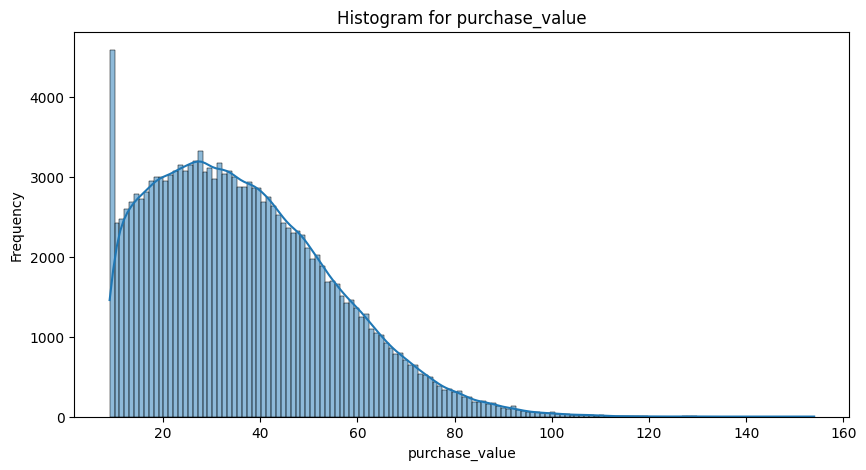

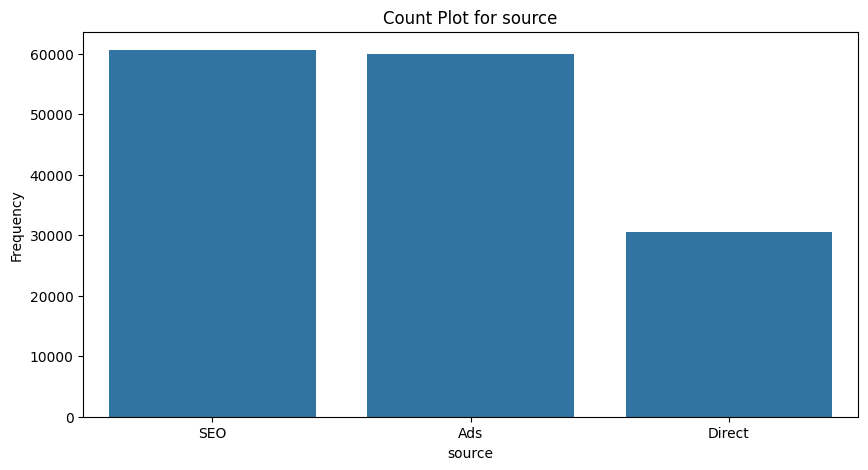

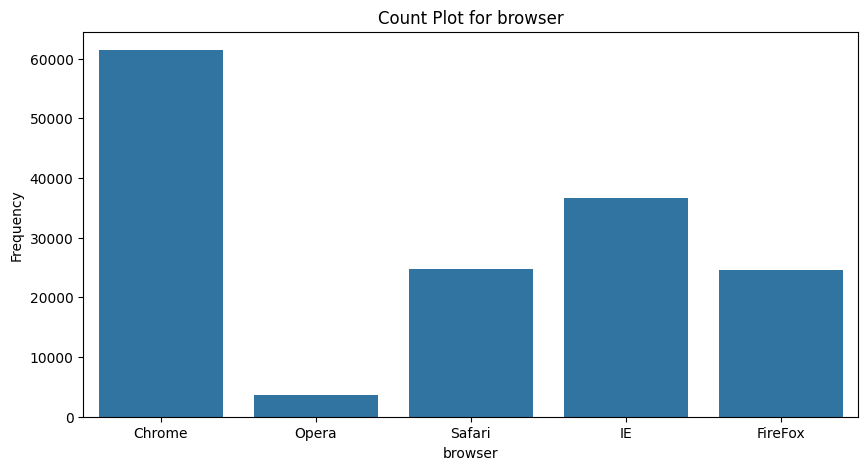

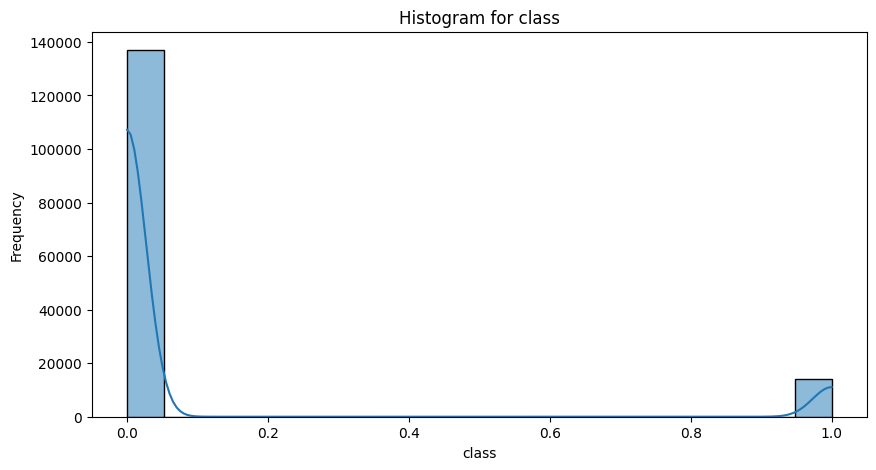

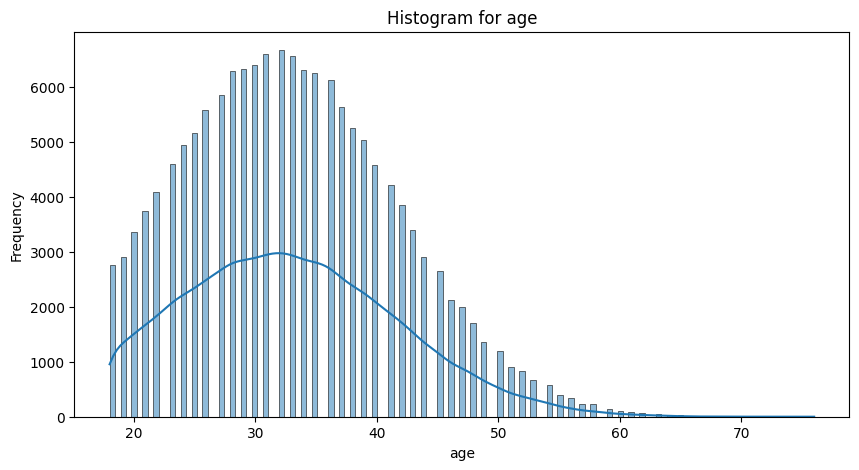

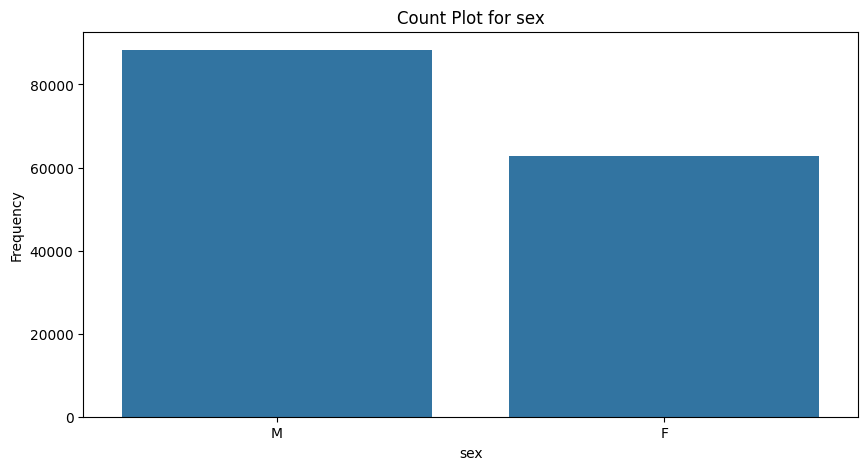

In [27]:
plot_univariate_analysis(df_fraud_data, univariate_columns_fraud_data)

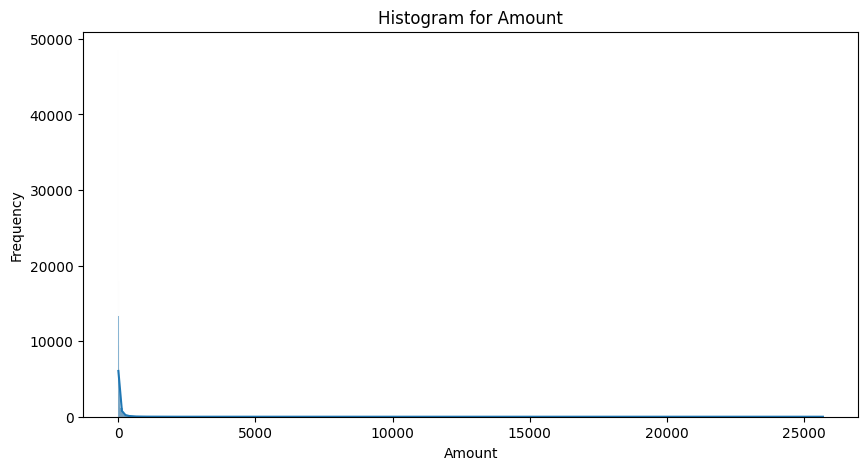

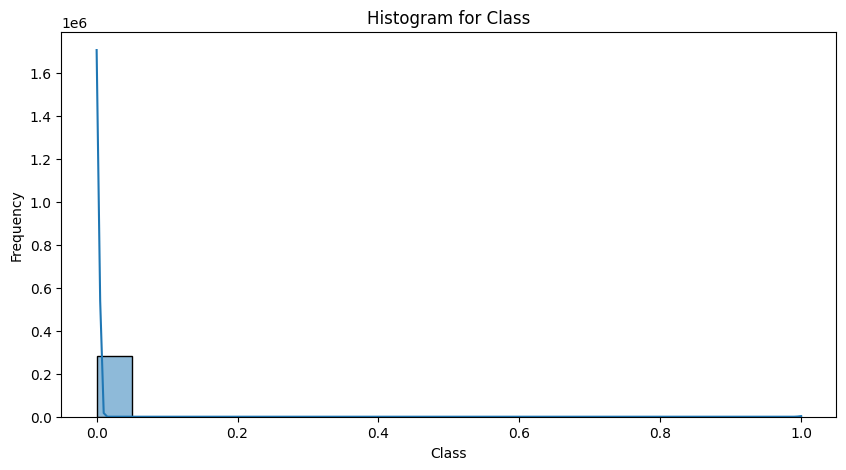

In [28]:
plot_univariate_analysis(df_creditcard, univariate_columns_credit_card)

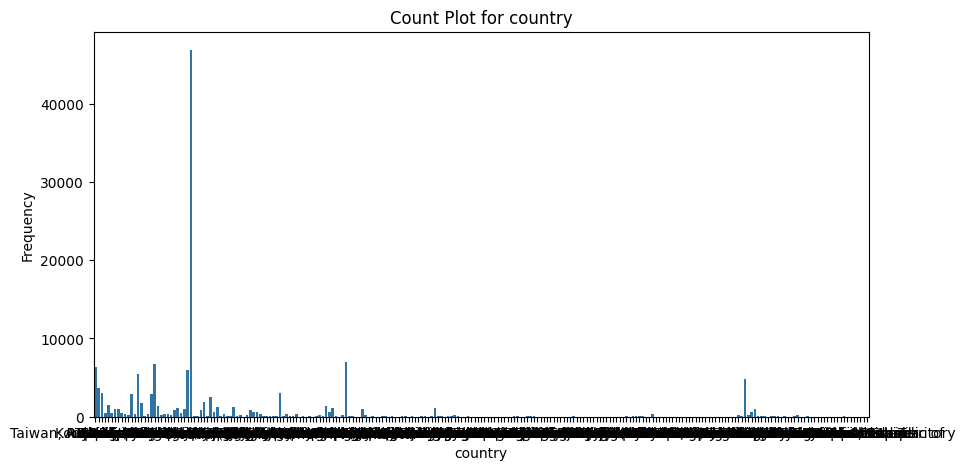

In [29]:
plot_univariate_analysis(df_IpAddress_to_Country, univariate_columns_IpAddress_to_Country)

In [30]:
amount_class = ['Amount', 'Class']

In [31]:
class_sex = ['class', 'sex']


In [32]:
class_age = ['class', 'age']


In [33]:
class_source = ['class', 'source']


In [34]:
class_purchase_value = ['class', 'purchase_value']


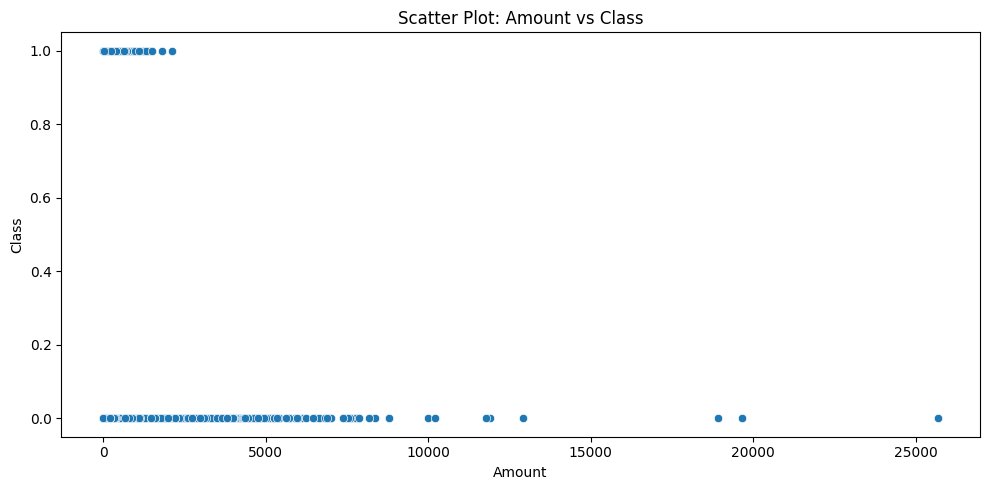

[]

In [35]:
plot_bivariate_analysis(df_creditcard, amount_class)


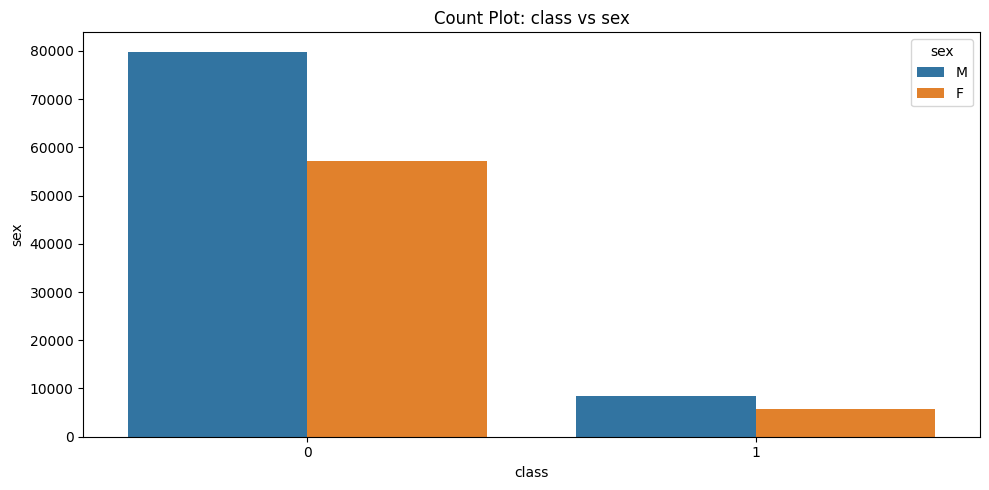

[]

In [36]:
plot_bivariate_analysis(df_fraud_data, class_sex)


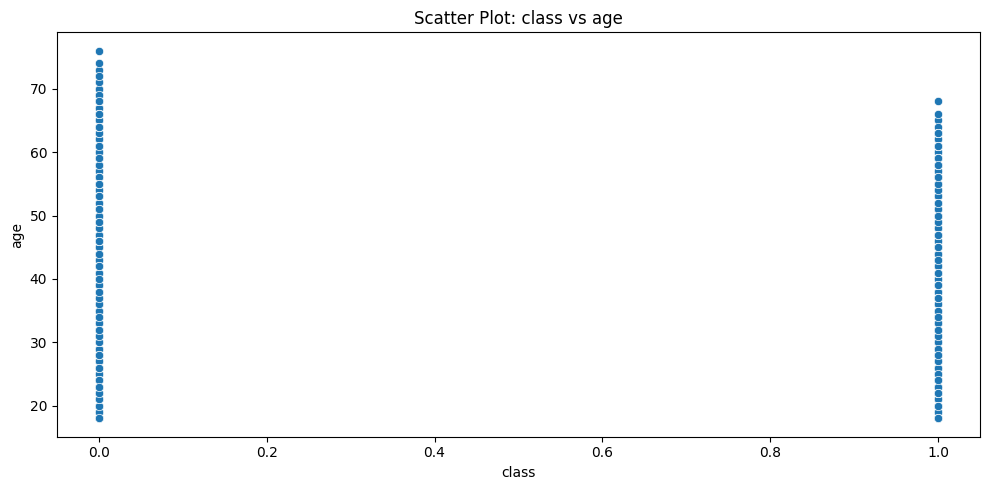

[]

In [37]:
plot_bivariate_analysis(df_fraud_data, class_age)


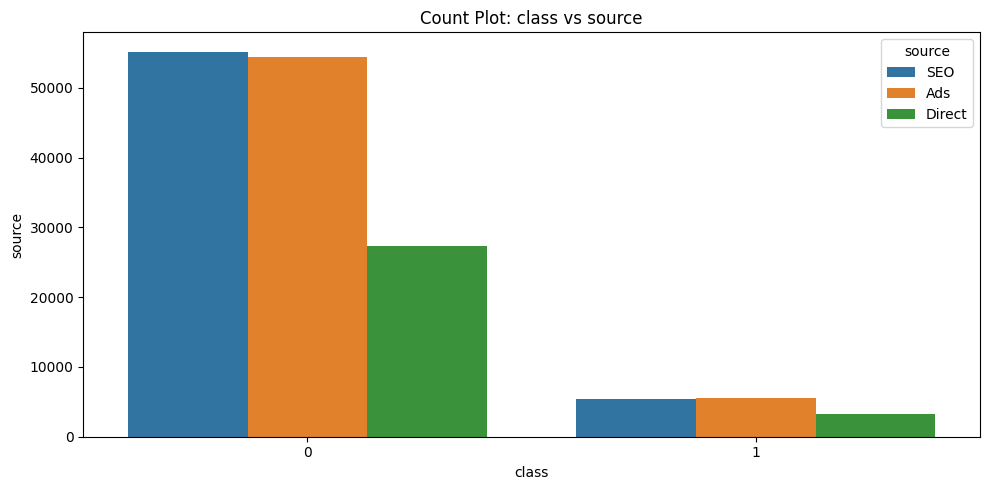

[]

In [38]:
plot_bivariate_analysis(df_fraud_data, class_source)


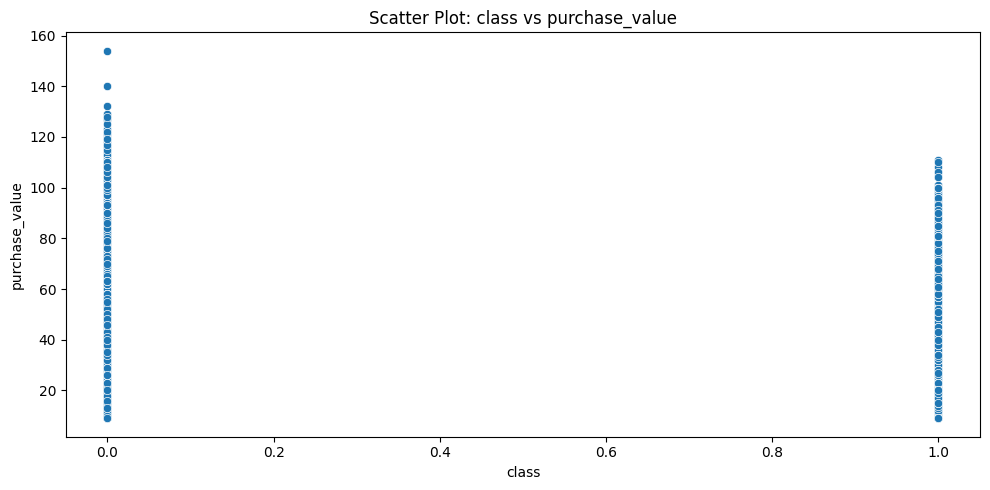

[]

In [39]:
plot_bivariate_analysis(df_fraud_data, class_purchase_value)


In [40]:
merged_df = merge_datasets_for_geolocation(df_fraud_data, df_IpAddress_to_Country)

In [41]:
merged_df.to_csv('../assets/processed/fraud_ip_to_country_merged_.csv', index=False)


# Feature engineering 

In [42]:
# Convert `signup_time` and `purchase_time` to datetime format
df_fraud_data['signup_time'] = pd.to_datetime(df_fraud_data['signup_time'])
df_fraud_data['purchase_time'] = pd.to_datetime(df_fraud_data['purchase_time'])

# Calculate transaction velocity (time difference between purchase_time and signup_time in hours)
df_fraud_data['transaction_velocity_hours'] = (df_fraud_data['purchase_time'] - df_fraud_data['signup_time']).dt.total_seconds() / 3600

In [43]:
# Convert `signup_time` and `purchase_time` to datetime
df_fraud_data['signup_time'] = pd.to_datetime(df_fraud_data['signup_time'])
df_fraud_data['purchase_time'] = pd.to_datetime(df_fraud_data['purchase_time'])

# Extract hour of day and day of week from `purchase_time`
df_fraud_data['hour_of_day'] = df_fraud_data['purchase_time'].dt.hour
df_fraud_data['day_of_week'] = df_fraud_data['purchase_time'].dt.dayofweek

In [44]:
df_fraud_data.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,ip_address_int,transaction_velocity_hours,hour_of_day,day_of_week
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,43.173.1.96,0,732758368,1251.856111,2,5
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,20.225.83.219,0,350311387,4.984444,1,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,156.64.132.28,1,2621473820,0.000278,18,3
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,228.234.6.235,0,3840542443,136.690278,13,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,24.197.75.141,0,415583117,1211.516944,18,2


# Normalization and encoding 

In [45]:
# Encode categorical features
fraud_data_encoded = encode_categorical_features(df_fraud_data)
credit_card_encoded = encode_categorical_features(df_creditcard)

In [46]:

# Normalize features
fraud_data_final = normalize_features(fraud_data_encoded)
credit_card_final = normalize_features(credit_card_encoded)

In [47]:
fraud_data_final.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,age,ip_address,class,ip_address_int,transaction_velocity_hours,hour_of_day,day_of_week,source_Direct,source_SEO,browser_FireFox,browser_IE,browser_Opera,browser_Safari,sex_M
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,-0.160204,QVPSPJUOCKZAR,0.679914,43.173.1.96,0,-1.136880,-0.136057,-1.377455,0.991020,False,True,False,False,False,False,True
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,-1.142592,EOGFQPIZPYXFZ,2.304476,20.225.83.219,0,-1.443207,-1.571877,-1.522122,-1.501259,False,False,False,False,False,False,False
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,-1.197169,YSSKYOSJHPPLJ,2.304476,156.64.132.28,1,0.375916,-1.577617,0.937208,-0.005891,False,True,False,False,True,False,True
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,0.385567,ATGTXKYKUDUQN,0.911994,228.234.6.235,0,1.352348,-1.420213,0.213876,-1.501259,False,True,False,False,False,True,True
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,0.112681,NAUITBZFJKHWW,1.376155,24.197.75.141,0,-1.390927,-0.182509,0.937208,-0.504347,False,False,False,False,False,True,True


In [49]:
credit_card_final.to_csv('../assets/processed/credit_card_final.csv', index=False)

In [48]:
fraud_data_final.to_csv('../assets/processed/fraud_data_final.csv', index=False)